Isabela P. L. Dias

M.Sc. in Physics and  data scientist

✉: isabeladiaspl@icloud.com

LinkedIn: [diasplisabela](https://www.linkedin.com/in/diasplisabela/)	Github: [isadays](https://github.com/isadays/)

São Paulo, Brazil.

The expedient and stringent protocols are both quantum error correction protocols designed to protect quantum data from errors induced by noise in quantum computing systems.

Expedient protocols are characterized by their speed and efficiency in error correction. They are suitable for scenarios where speed is crucial, such as real-time quantum communication, rapid data processing, or applications requiring low-latency error correction.

Stringent protocols prioritize accuracy and reliability in error correction. They are suitable for applications where accuracy is paramount, such as quantum cryptography, fault-tolerant quantum computing, or tasks requiring high-fidelity error correction.



**References**:


1.  Nickerson, N. H., Li, Y., & Benjamin, S. C. (2013). Topological quantum computing with a very noisy network and local error rates approaching one percent. Nature communications, **4(1)**, 1756.
2.   Ghaeminezhad, N., & Cong, S. (2022). Preparation of the Hadamard and CNOT gates to realize the maximum entangled states. J. Frankl. Inst., **360**, 13870-13888.
3. Introduction to Quantum Computing for Physicists -
https://obm.physics.metu.edu.tr/intro-QC/courses/PHYS710/hands-on/hands-on-2/hands-on-2-book.html





In [ ]:
!pip install qiskit -U
!pip install qiskit_aer
!pip install qiskit-ignis
!pip install pylatexenc

In [75]:
from qiskit import QuantumCircuit, transpile,assemble
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.transpiler.passes import Unroll3qOrMore
from qiskit_aer.noise import NoiseModel
from qiskit_aer.noise.errors import depolarizing_error
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, CompleteMeasFitter)
import numpy as np

This code creates a simple quantum circuit with 5 qubits and 5 classical bits. The circuit applies Hadamard gates to the first qubit (qc.h(0)) and then applies a series of CNOT gates (qc.cx) between adjacent qubits. Finally, it measures all qubits and stores the results in the corresponding classical bits (qc.measure).

After defining the circuit, it prints out the circuit diagram using print(qc.draw()). Then, it initializes an AerSimulator and runs the circuit on the simulator with 4000 shots (job = simulator.run(qc, shots=4000)). Once the simulation is complete, it retrieves the measurement results (counts = result.get_counts(qc)) and prints out the total counts obtained for each measurement outcome.

In [61]:
# Create a Quantum Circuit with 5 qubits
qc = QuantumCircuit(5, 5)

# Add gates and measurements
qc.h(0)
qc.cx(0, 1)
qc.cx(1, 2)
qc.cx(2, 3)
qc.cx(3, 4)
qc.measure([0, 1, 2, 3, 4], [0, 1, 2, 3, 4])

# Draw the circuit
print(qc.draw())

simulator = AerSimulator()
job = simulator.run(qc, shots=4000)
result = job.result()

counts = result.get_counts(qc)
print("\nTotal counts:", counts)


     ┌───┐          ┌─┐                      
q_0: ┤ H ├──■───────┤M├──────────────────────
     └───┘┌─┴─┐     └╥┘     ┌─┐              
q_1: ─────┤ X ├──■───╫──────┤M├──────────────
          └───┘┌─┴─┐ ║      └╥┘     ┌─┐      
q_2: ──────────┤ X ├─╫───■───╫──────┤M├──────
               └───┘ ║ ┌─┴─┐ ║      └╥┘┌─┐   
q_3: ────────────────╫─┤ X ├─╫───■───╫─┤M├───
                     ║ └───┘ ║ ┌─┴─┐ ║ └╥┘┌─┐
q_4: ────────────────╫───────╫─┤ X ├─╫──╫─┤M├
                     ║       ║ └───┘ ║  ║ └╥┘
c: 5/════════════════╩═══════╩═══════╩══╩══╩═
                     0       1       2  3  4 

Total counts: {'00000': 2069, '11111': 1931}


The function generate_ghz_state takes two arguments: qc, which is the quantum circuit to which the gates will be applied, and qubits, which is a list of qubit indices across which the GHZ state will be generated.

 The Hadamard gate (qc.h(qubits[0])) is applied to the first qubit in the list of qubits (qubits[0]). This puts the first qubit in a superposition state.

A series of CNOT gates is applied to create entanglement between the first qubit and all the other qubits in the list. For each qubit qubit in the list qubits[1:] (excluding the first qubit), a CNOT gate is applied with the first qubit (qubits[0]) as the control qubit and qubit as the target qubit (qc.cx(qubits[0], qubit)).

In [62]:
def generate_ghz_state(qc, qubits):
    """Generate a GHZ state across the specified qubits."""
    # Apply Hadamard gate to the first qubit
    qc.h(qubits[0])
    for qubit in qubits[1:]:
       qc.cx(qubits[0], qubit)


measure_stabilizer_z Function:
Input Parameters: The function takes three parameters: qc, the quantum circuit; qubits, a list of qubits to be measured; and ancilla, an ancillary qubit used in the measurement process.

 First, a series of CNOT gates and Hadamard gates are applied to prepare the qubits for measurement in the Z-basis.

 A barrier is inserted to separate the preparation stage from the measurement stage.

 The first qubit in the qubits list is measured in the Z-basis using qc.measure([qubits[0]], [0]). After measurement, the qubit and ancilla are reset to the |0⟩ state using qc.reset(qubits[0]) and qc.reset(ancilla), respectively.

measure_stabilizer_x Function: Similar to measure_stabilizer_z, this function also takes qc, qubits, and ancilla as parameters.

The qubits are prepared for measurement in the X-basis by applying Hadamard gates to each qubit in the qubits list.

Similar to measure_stabilizer_z, a barrier is inserted.

The first qubit in the qubits list is measured in the X-basis. After measurement, the qubit and ancilla are reset to the |0⟩ state.

In [63]:
def measure_stabilizer_z(qc, qubits, ancilla):
    """Perform stabilizer measurement in the Z-basis."""
    qc.cx(qubits[0], ancilla)
    qc.h(qubits[0])
    for i in range(1, len(qubits)):
        qc.cx(qubits[i], qubits[0])
    qc.barrier()
    qc.measure([qubits[0]], [0])
    qc.reset(qubits[0])
    qc.reset(ancilla)

def measure_stabilizer_x(qc, qubits, ancilla):
    """Perform stabilizer measurement in the X-basis."""
    qc.h(qubits[0])
    for i in range(1, len(qubits)):
        qc.cx(qubits[i], qubits[0])
    qc.barrier()
    qc.measure([qubits[0]], [0])
    qc.reset(qubits[0])
    qc.reset(ancilla)


apply_gate_error: The function takes four parameters: qc, the quantum circuit; gate, the gate operation to which the error is applied; qubits, the qubits on which the gate operates; and error_prob, the probability of error.

 An error matrix is constructed based on the given error_prob. This error matrix represents the error to be applied to the gate operation.

The gate operation is multiplied by the error matrix to apply the error.

 The resulting error gate is applied to the specified qubits in the quantum circuit using qc.unitary.
apply_measurement_error Function: This function takes three parameters: qc, the quantum circuit; qubit, the qubit on which the measurement operation is performed; and error_prob, the probability of error.

Error Application: If a randomly generated number is less than the error_prob, indicating that an error occurs, the qubit is reset to the |0⟩ state using qc.reset(qubit). The function returns True to indicate that an error occurred; otherwise, it returns False.

apply_bell_pair_error Function: Similar to apply_measurement_error, this function takes qc, qubits, and error_prob as parameters.

Error Application: If a randomly generated number is less than the error_prob, indicating that an error occurs, both qubits in the Bell pair generation are reset to the |0⟩ state using qc.reset(qubits). The function returns True to indicate that an error occurred; otherwise, it returns False.

In [16]:
def apply_gate_error(qc, gate, qubits, error_prob):
    """Apply an error to a gate operation."""
    error_matrix = np.sqrt(1 - error_prob) * np.eye(2) + np.sqrt(error_prob) * np.array([[0, 1], [1, 0]])
    error_gate = gate * error_matrix
    qc.unitary(error_gate, qubits)

def apply_measurement_error(qc, qubit, error_prob):
    """Apply an error to a measurement operation."""
    if np.random.rand() < error_prob:
        qc.reset(qubit)
        return True
    return False

def apply_bell_pair_error(qc, qubits, error_prob):
    """Apply an error to Bell pair generation."""
    if np.random.rand() < error_prob:
        qc.reset(qubits)
        return True
    return False


expedient_protocol Function: It takes four parameters: qc (the quantum circuit), data_qubit (the qubit containing the data to be protected), ancilla_qubits (a list of ancillary qubits), and error_prob (the probability of error).

Protocol Steps:

Generate GHZ State: This function generates a GHZ state across the specified ancillary qubits.

Measure Stabilizer in Z-basis: It performs a stabilizer measurement in the Z-basis using the ancillary qubits and the data qubit.

Introduce Error: An error is introduced in the stabilizer measurement of the data qubit using the specified error probability.

stringent_protocol Function: Similar to expedient_protocol, it takes qc, data_qubit, ancilla_qubits, and error_prob.

Protocol Steps:

Generate GHZ State: Generates a GHZ state across the specified ancillary qubits.

Measure Stabilizer in X-basis: Performs a stabilizer measurement in the X-basis using the ancillary qubits and the data qubit.

Introduce Error: Similar to expedient_protocol, an error is introduced in the stabilizer measurement of the data qubit using the specified error probability.


In [64]:
def expedient_protocol(qc, data_qubit, ancilla_qubits, error_prob):
    """Implement the EXPEDIENT protocol."""
    # Generate GHZ state
    generate_ghz_state(qc, ancilla_qubits)
    # Measure stabilizer in Z-basis
    measure_stabilizer_z(qc, ancilla_qubits, data_qubit)
    # Introduce error in stabilizer measurement
    apply_measurement_error(qc, data_qubit, error_prob)

def stringent_protocol(qc, data_qubit, ancilla_qubits, error_prob):
    """Implement the STRINGENT protocol."""
    # Generate GHZ state
    generate_ghz_state(qc, ancilla_qubits)
    # Measure stabilizer in X-basis
    measure_stabilizer_x(qc, ancilla_qubits, data_qubit)
    # Introduce error in stabilizer measurement
    apply_measurement_error(qc, data_qubit, error_prob)


EXPEDIENT Circuit:
                             ┌───┐                         ░           
q_0: ────────────────────────┤ X ├─────────────────────────░──|0>──────
     ┌────────────┐          └─┬─┘┌────────────┐┌───┐┌───┐ ░  ┌─┐      
q_1: ┤ U(π/2,0,π) ├──■────■────■──┤ U(π/2,0,π) ├┤ X ├┤ X ├─░──┤M├──|0>─
     └────────────┘┌─┴─┐  │       └────────────┘└─┬─┘└─┬─┘ ░  └╥┘      
q_2: ──────────────┤ X ├──┼───────────────────────■────┼───░───╫───────
                   └───┘┌─┴─┐                          │   ░   ║       
q_3: ───────────────────┤ X ├──────────────────────────■───░───╫───────
                        └───┘                              ░   ║       
c: 1/══════════════════════════════════════════════════════════╩═══════
                                                               0       
STRINGENT Circuit:
                                                      ░           
q_0: ─────────────────────────────────────────────────░──|0>──────
     ┌────────────┐          ┌──────

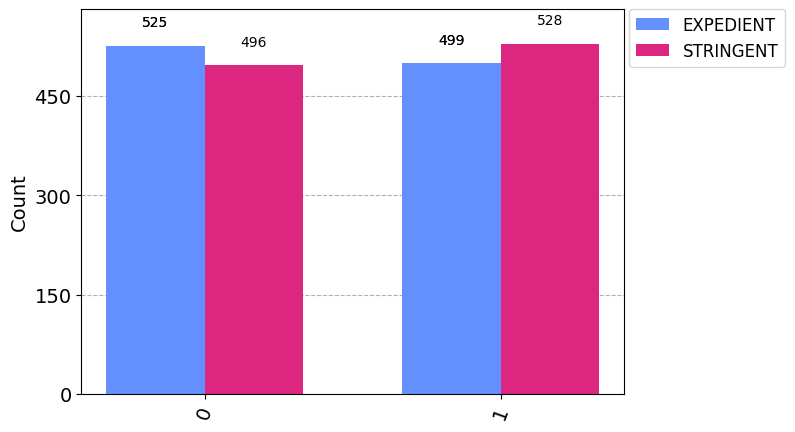

In [65]:
# Define the number of qubits and ancilla qubits
num_data_qubits = 1
num_ancilla_qubits = 3

# Create quantum circuits for EXPEDIENT and STRINGENT protocols
expedient_circuit = QuantumCircuit(num_data_qubits + num_ancilla_qubits, num_data_qubits)
stringent_circuit = QuantumCircuit(num_data_qubits + num_ancilla_qubits, num_data_qubits)

# Set error probability
error_prob = 0.1

# Apply the protocol variants to the circuits
expedient_protocol(expedient_circuit, 0, range(1, 4), error_prob)
stringent_protocol(stringent_circuit, 0, range(1, 4), error_prob)

# Transpile the circuits for simulation
expedient_circuit = transpile(expedient_circuit, basis_gates=['u', 'cx'], optimization_level=3)
stringent_circuit = transpile(stringent_circuit, basis_gates=['u', 'cx'], optimization_level=3)

# Simulate the circuits
simulator = AerSimulator()
expedient_result = simulator.run(expedient_circuit).result()
stringent_result = simulator.run(stringent_circuit).result()

# Plot results
expedient_counts = expedient_result.get_counts()
stringent_counts = stringent_result.get_counts()

print("EXPEDIENT Circuit:")
print(expedient_circuit)
print("STRINGENT Circuit:")
print(stringent_circuit)
print("EXPEDIENT Counts:")
print(expedient_counts)
print("STRINGENT Counts:")
print(stringent_counts)
plot_histogram([expedient_counts, stringent_counts], legend=['EXPEDIENT', 'STRINGENT'])


In [126]:
from qiskit.visualization import circuit_drawer

# Draw the circuit
#circuit_drawer(expedient_circuit, output='text')
circuit_drawer(expedient_circuit, output='text')



┌───┐                         ░           
q_0: ────────────────────────┤ X ├─────────────────────────░──|0>──────
     ┌────────────┐          └─┬─┘┌────────────┐┌───┐┌───┐ ░  ┌─┐      
q_1: ┤ U(π/2,0,π) ├──■────■────■──┤ U(π/2,0,π) ├┤ X ├┤ X ├─░──┤M├──|0>─
     └────────────┘┌─┴─┐  │       └────────────┘└─┬─┘└─┬─┘ ░  └╥┘      
q_2: ──────────────┤ X ├──┼───────────────────────■────┼───░───╫───────
                   └───┘┌─┴─┐                          │   ░   ║       
q_3: ───────────────────┤ X ├──────────────────────────■───░───╫───────
                        └───┘                              ░   ║       
c: 1/══════════════════════════════════════════════════════════╩═══════
                                                               0

In [66]:
optimization_levels = [0, 1, 2, 3]

# Dictionary to store the transpiled circuits
transpiled_circuits = {}

# Transpile circuits with different optimization levels
for opt_level in optimization_levels:
    expedient_circuit_opt = transpile(expedient_circuit,
                                      basis_gates=['u', 'cx'],
                                      optimization_level=opt_level)
    stringent_circuit_opt = transpile(stringent_circuit,
                                      basis_gates=['u', 'cx'],
                                      optimization_level=opt_level)
    transpiled_circuits[opt_level] = (expedient_circuit_opt, stringent_circuit_opt)

# Simulate the transpiled circuits and store the results
results = {}
for opt_level, (expedient_circuit_opt, stringent_circuit_opt) in transpiled_circuits.items():
    expedient_result_opt = simulator.run(expedient_circuit_opt).result()
    stringent_result_opt = simulator.run(stringent_circuit_opt).result()
    results[opt_level] = (expedient_result_opt.get_counts(), stringent_result_opt.get_counts())

# Plot results for each optimization level
for opt_level, (expedient_counts_opt, stringent_counts_opt) in results.items():
    print(f"Optimization Level {opt_level}:")
    print("EXPEDIENT Counts:")
    print(expedient_counts_opt)
    print("STRINGENT Counts:")
    print(stringent_counts_opt)
    plot_histogram([expedient_counts_opt, stringent_counts_opt],
                   legend=['EXPEDIENT', 'STRINGENT'],
                   title=f"Optimization Level {opt_level}")


Optimization Level 0:
EXPEDIENT Counts:
{'1': 506, '0': 518}
STRINGENT Counts:
{'0': 528, '1': 496}
Optimization Level 1:
EXPEDIENT Counts:
{'1': 495, '0': 529}
STRINGENT Counts:
{'1': 512, '0': 512}
Optimization Level 2:
EXPEDIENT Counts:
{'1': 539, '0': 485}
STRINGENT Counts:
{'0': 497, '1': 527}
Optimization Level 3:
EXPEDIENT Counts:
{'0': 503, '1': 521}
STRINGENT Counts:
{'1': 480, '0': 544}


In [32]:
def calculate_error_rate(counts, expected_counts):
    """
    Calculate the error rate based on the counts obtained from simulation results.

    Args:
        counts (dict): Dictionary containing the counts obtained from simulation results.
        expected_counts (dict): Dictionary containing the expected counts for comparison.

    Returns:
        float: Error rate calculated based on the counts.
    """
    total_errors = 0
    total_measurements = 0

    # Calculate total errors
    for outcome, count in counts.items():
        if outcome in expected_counts:
            total_errors += abs(count - expected_counts[outcome])
            total_measurements += count

    # Calculate error rate
    error_rate = total_errors / total_measurements

    return error_rate


In [69]:
# Call the calculate_error_rate function for the EXPEDIENT protocol
expedient_error_rate = calculate_error_rate(expedient_counts)

# Call the calculate_error_rate function for the STRINGENT protocol
stringent_error_rate = calculate_error_rate(stringent_counts)

# Print the error rates
print("EXPEDIENT Error Rate:", expedient_error_rate)
print("STRINGENT Error Rate:", stringent_error_rate)


EXPEDIENT Error Rate: 0.4873046875
STRINGENT Error Rate: 0.515625


The following function takes a quantum circuit, applies gate synthesis optimization by transpiling the circuit using a pass manager that includes the Unroll3qOrMore pass, and returns the transpiled circuit with gate synthesis optimization applied.

In [70]:
# Function to apply gate synthesis optimization
def apply_gate_synthesis(circuit):
    # Define a pass manager with the Unroller pass for gate synthesis
    pass_manager = Unroll3qOrMore(['u3', 'cx'])

    # Transpile the circuit to apply gate synthesis
    transpiled_circuit = transpile(circuit, optimization_level=0)

    return transpiled_circuit


In [72]:
expedient_optimized = apply_gate_synthesis(expedient_circuit)
stringent_optimized = apply_gate_synthesis(stringent_circuit)

# Compare the original and optimized circuit depths
expedient_depth = expedient_circuit.depth()
stringent_depth = stringent_circuit.depth()
expedient_opt_depth = expedient_optimized.depth()
stringent_opt_depth = stringent_optimized.depth()

print("Original EXPEDIENT Circuit Depth:", expedient_depth)
print("Optimized EXPEDIENT Circuit Depth:", expedient_opt_depth)
print("Original STRINGENT Circuit Depth:", stringent_depth)
print("Optimized STRINGENT Circuit Depth:", stringent_opt_depth)


Original EXPEDIENT Circuit Depth: 9
Optimized EXPEDIENT Circuit Depth: 9
Original STRINGENT Circuit Depth: 8
Optimized STRINGENT Circuit Depth: 8


The following code defines several functions for simulating quantum circuits with noise and performing error mitigation using zero noise extrapolation

In [117]:
# Function to simulate a quantum circuit with noise
def simulate_with_noise(circuit, noise_model, shots=1024):
    simulator = AerSimulator()
    t_circuit = transpile(circuit, simulator)
    qobj = assemble(t_circuit, shots=shots)
    result = simulator.run(qobj, noise_model=noise_model).result()
    counts = result.get_counts(circuit)
    return counts

In [76]:
error_prob_u3 = 0.001
error_prob_cx = 0.01

error_u3 = depolarizing_error(error_prob_u3, 1)
error_cx = depolarizing_error(error_prob_cx, 2)

noise_model = NoiseModel()
noise_model.add_all_qubit_quantum_error(error_u3, ['u3'])
noise_model.add_all_qubit_quantum_error(error_cx, ['cx'])


<ipython-input-73-d24ac2a96c63>:6: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.14 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = simulator.run(qobj, noise_model=noise_model).result()


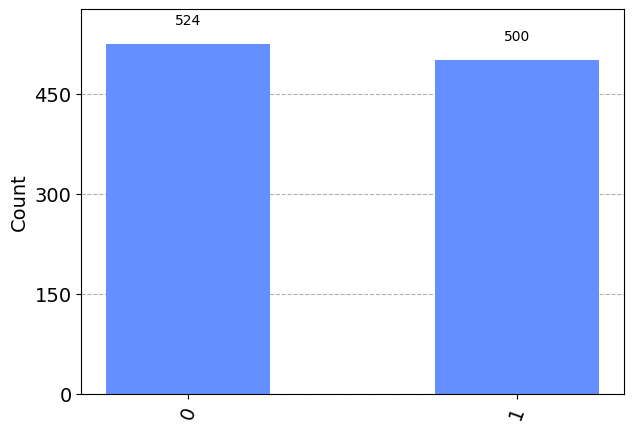

In [81]:
# Simulate the EXPEDIENT circuit with noise using the noise model
expedient_counts_with_noise = simulate_with_noise(expedient_circuit, noise_model)
stringent_counts_with_noise = simulate_with_noise(stringent_circuit, noise_model)

# Plot the histogram of counts
plot_histogram(expedient_counts_with_noise)
plot_histogram(stringent_counts_with_noise)